In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [3]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 12)

In [6]:
# there are no dulicates
df[df.duplicated()].shape

(0, 12)

In [7]:
#cheking different missing values in different columns
df['director'].isna().sum()

2389

In [8]:
df['release_year'].isna().sum()

0

In [9]:
df['type'].isna().sum()

0

In [10]:
df['duration'].isna().sum()

0

In [11]:
df['country'].isna().sum()

507

In [12]:
#dropping missing values in date_added and rating column
df.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
df['date_added'].isna().sum()

0

In [14]:
df['rating'].isna().sum()

0

In [15]:
df=df.drop(['director'], axis=1)

In [16]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
df.shape

(7770, 11)

In [18]:
#country has null values
df['country'].isna().sum()

505

In [19]:
df['country'].shape

(7770,)

In [20]:
df['country'].describe(include='all')

count              7265
unique              681
top       United States
freq               2546
Name: country, dtype: object

#The highest occuring country is united states.Thus we will replace nan values in country with United States


In [21]:
df['country'].fillna('United States', inplace=True)

In [22]:
df['country'].isna().sum()

0

> #lets remove the nan values in the dataset

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(7052, 11)

#only 7052 rows or entries are remaining

In [25]:
df['type'].value_counts()

Movie      4946
TV Show    2106
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

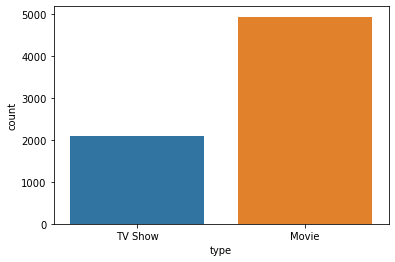

In [26]:
sns.countplot(x=df['type'])

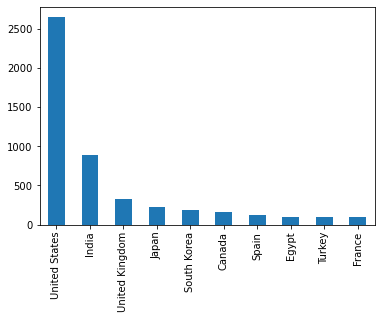

In [27]:
country_sort=df['country'].value_counts(ascending=False).head(10).plot.bar(stacked=False)


#from the graph above we can see that US, India,UK, Japan and South Korea are top 5 countries that release highest content. USA is the highest content releasing country followed by India.

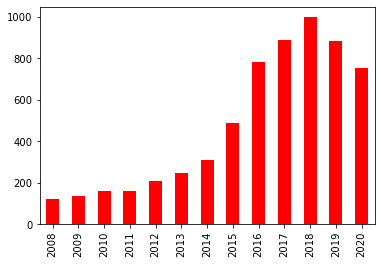

In [28]:
date_released=df['release_year'].value_counts(ascending=False).head(13).plot.bar(stacked=False, color='red')


The highest number of releases were in the year 2018. The content has started to increase in the netfilx from the year 2012.The year 2020 has less releases(may be due to corona virus pandemic).

In [29]:
#Lets create a new data frame to store number of releases as per country
df['release_count']=np.nan

In [30]:
#code to store value counts of country in the release count of dataframe
z=df['country'].value_counts()
z1=z.to_dict()
df['release_count']=df['country'].map(z1)

<AxesSubplot:xlabel='release_year', ylabel='release_count'>

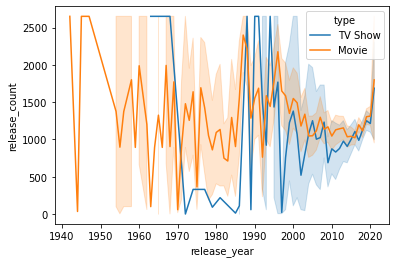

In [31]:
sns.lineplot(x=df['release_year'], y=df['release_count'], hue=df['type'])

From the lineplot we can see that the number of releases of T.V shows were higher during the time period of 1985 to 1995. Then there was a sudden drop in the release count of T.V shows. Again from 2015 the number of releases for TV shows increased. In the year 2020, the number of releases of T.V shows and movies are almost same but number of movie released is slightly more than number of T.V shows.
In the time period of 2010 to 2020(last decade)- The number of movie releases are much higher than T.V releases

In [32]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,release_count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,63
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,92
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",23
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2651
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2651


<AxesSubplot:>

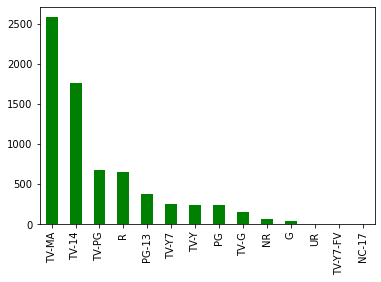

In [33]:
df['rating'].value_counts().plot.bar(stacked=False, color='green')


From the above figure we can see that shows with rating TV-MA has the highest number of releases, followed by TV-14 and TV-PG.

In [34]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,release_count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,63
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,92
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",23
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2651
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2651


<AxesSubplot:>

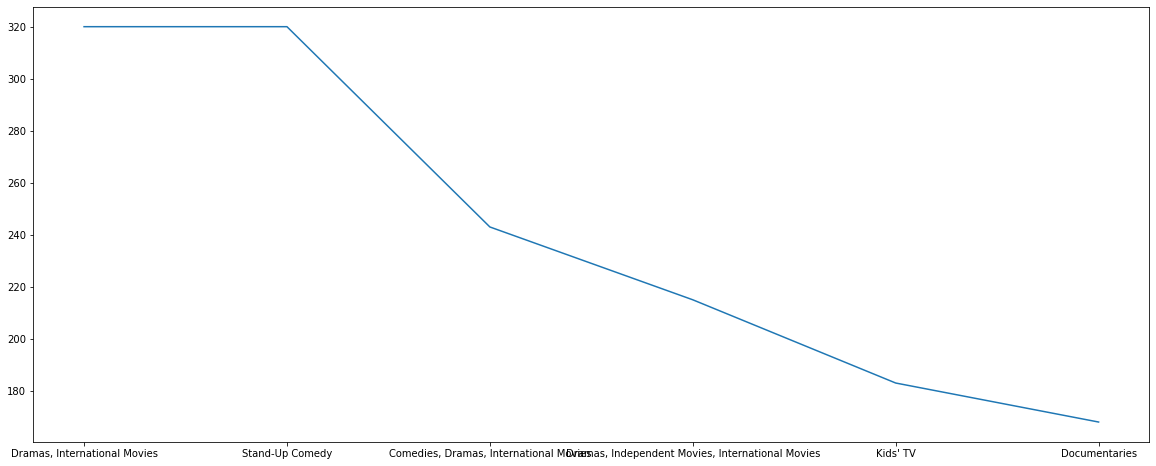

In [38]:
df['listed_in'].value_counts().head(6).plot(kind='line', figsize=[20,8])

From the above line graph it is evident that Drama and International movies and stand up comedy has the highest amount of releases as compared to other genre types. There are less releases for the Kids genre and Documentaries genre.

In [44]:
df['duration'].value_counts().head(6).plot(kind='line', figsize=[20,8])

ValueError: dist is not a valid plot kind

From the above plot it is evident that 

From the above line graph it is evident that T.V shows with 1st season has maximum number of releases. There are less amount of releases for the shows that have longer play time.

<AxesSubplot:>

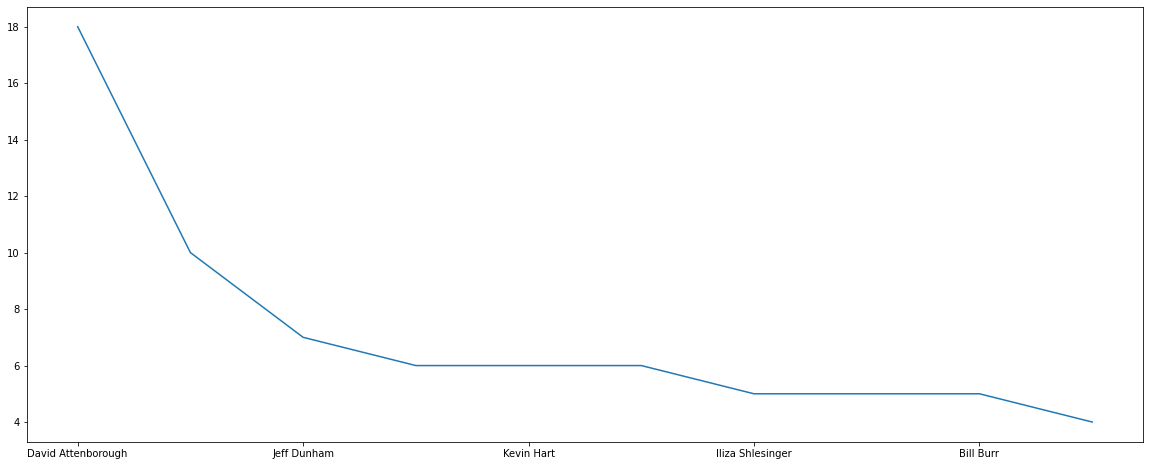

In [42]:
df['cast'].value_counts().head(10).plot(kind='line',figsize=[20,8])

David Attenbrough has been casted for most of the releases, followed by Jeff Dunham and Kevin Hart

<AxesSubplot:xlabel='release_year', ylabel='release_count'>

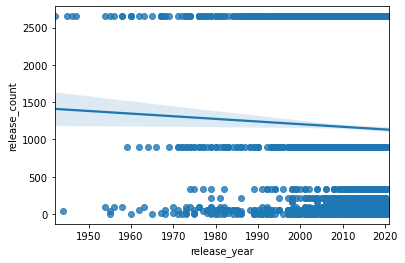

In [43]:
sns.regplot(x=df['release_year'], y=df['release_count'])

From the above regression plot it can be determined that the relationship between release_year and number of releases cannot be determined. But still there is a slight negative relationship which means that the number of releases over the year ranging from 1950 to 2020 have decreased.